<a href="https://colab.research.google.com/github/lemonataste/DataScience/blob/main/ml/%EC%A0%84%EA%B8%B0%EC%B0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

라이브러리 임포트


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import csv
import plotly.graph_objects as go
import folium
import pandas as pd

한글 깨짐방지

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


데이터를 활용 해 꺾은선 그래프 그리기


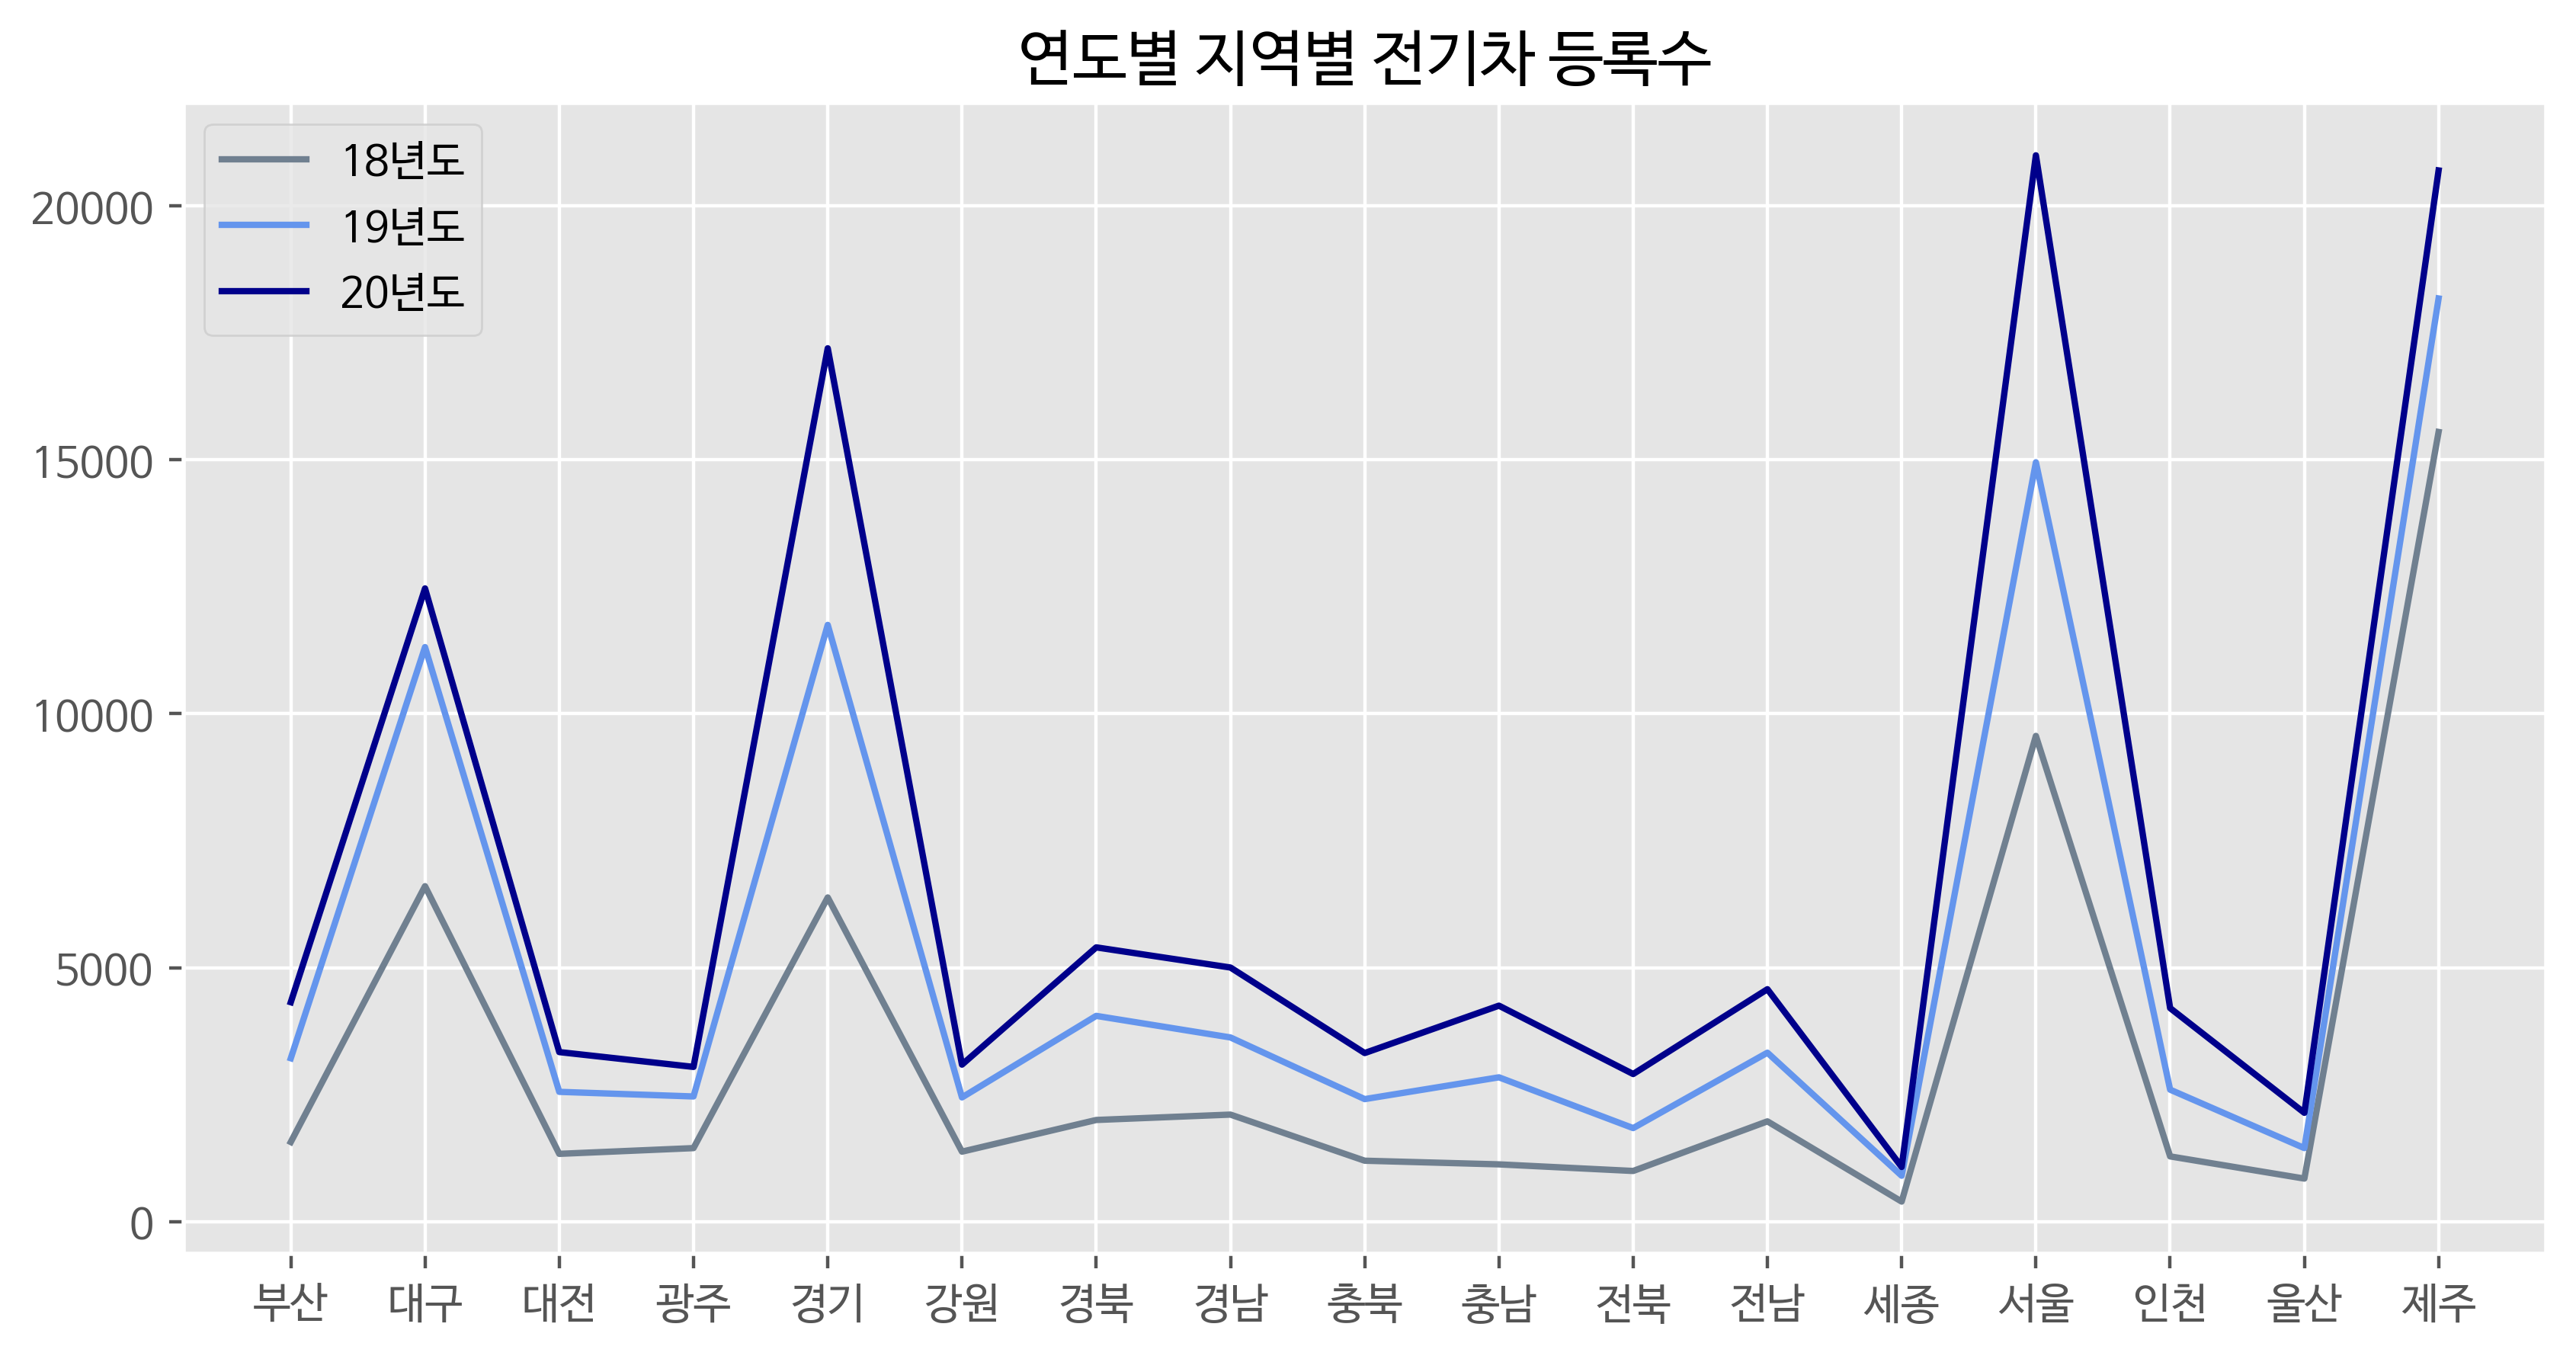

In [ ]:
#데이터 불러오기
f = open('/content/한국전력공사_지역별 전기차 현황정보_20201008.csv', encoding="euc-kr")
car_data = csv.reader(f)
next(car_data)

#값을 담을 리스트 생성
elecar18 = []
elecar19 = []
elecar20 =[]
local =['부산',	'대구',	'대전',	'광주',	'경기','강원',	'경북',	'경남',	'충북',	'충남',	'전북',	'전남',	'세종',	'서울',	'인천',	'울산',	'제주']

#값 담아주기
for row in car_data :
    if '2018' in row[0]:
      for i in range(1,18):
        elecar18.append(int(row[i]))

    if '2019' in row[0]:
      for i in range(1,18):
        elecar19.append(int(row[i]))

    if '2020' in row[0]:
      for i in range(1,18):
        elecar20.append(int(row[i]))

#시각화
plt.figure(figsize=(10,5),dpi=200)
plt.rc('font', family='NanumBarunGothic') 
plt.title('연도별 지역별 전기차 등록수')    
plt.style.use('ggplot')

plt.plot(local, elecar18, 'slategray', label='18년도')
plt.plot(local, elecar19, 'cornflowerblue', label='19년도')
plt.plot(local, elecar20, 'darkblue', label='20년도')
plt.legend()
plt.show()

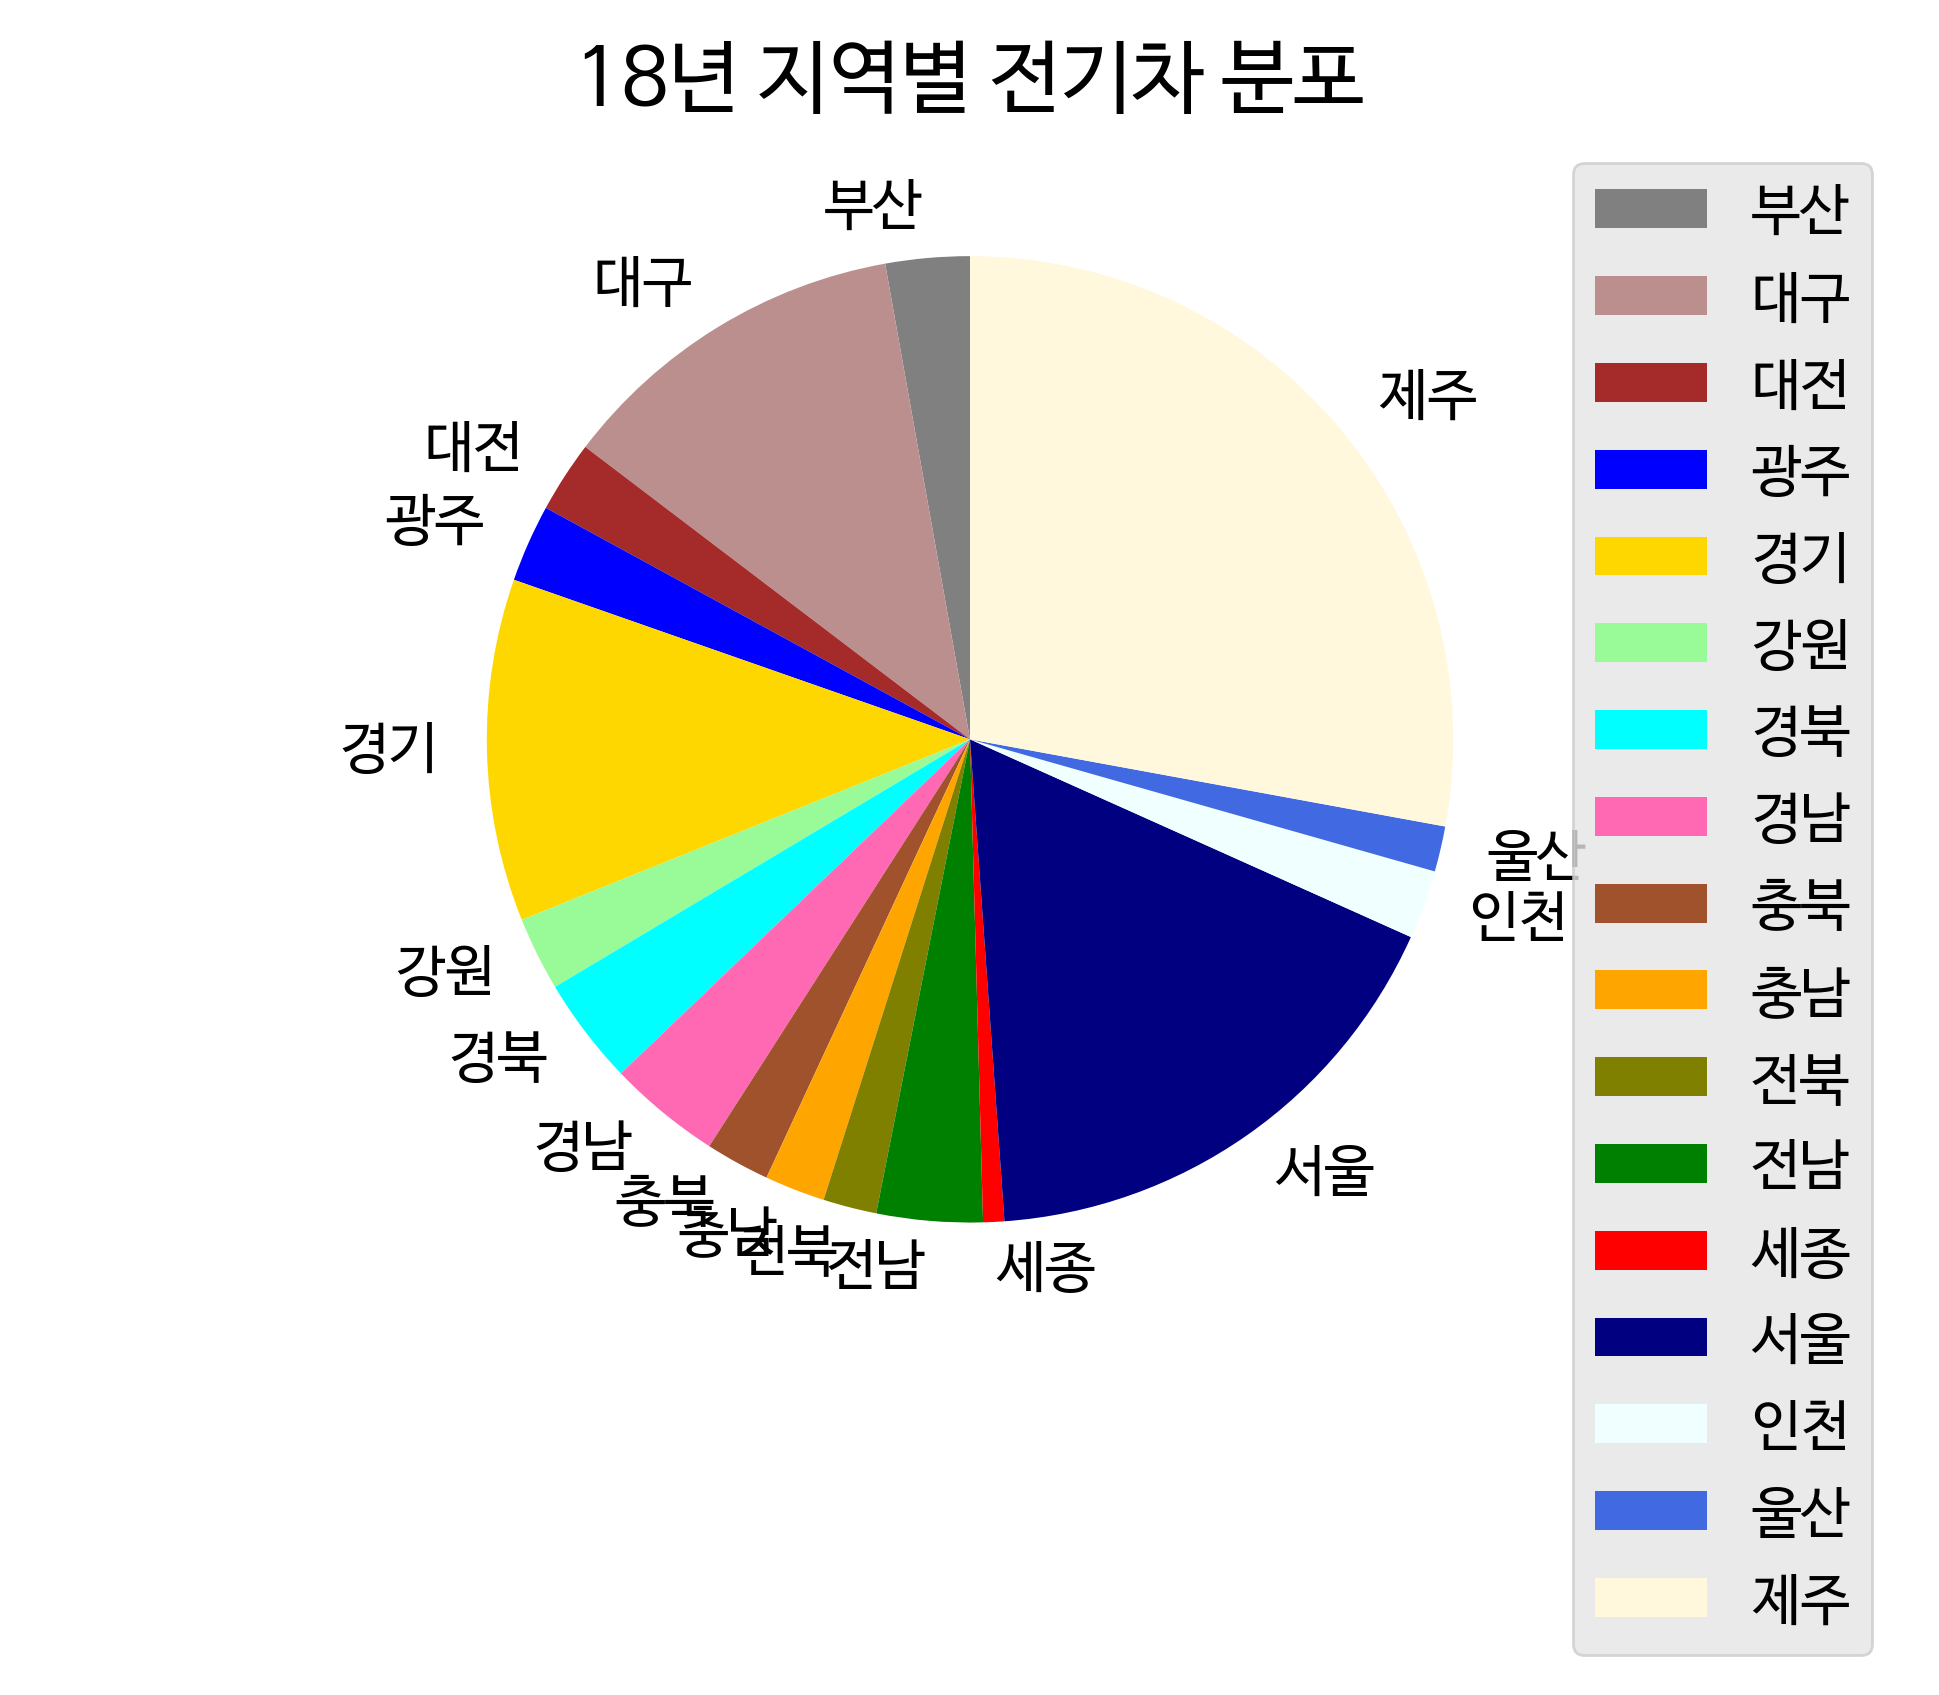

In [ ]:
color = ['gray','rosybrown','brown','blue','gold','palegreen','cyan','hotpink','sienna','orange','olive','green','red','navy','azure','royalblue','cornsilk']
plt.figure(dpi=200)
plt.axis('equal')
plt.pie(elecar18,labels=local,colors=color,startangle = 90) 
plt.title('18년 지역별 전기차 분포')
plt.legend()
plt.show()

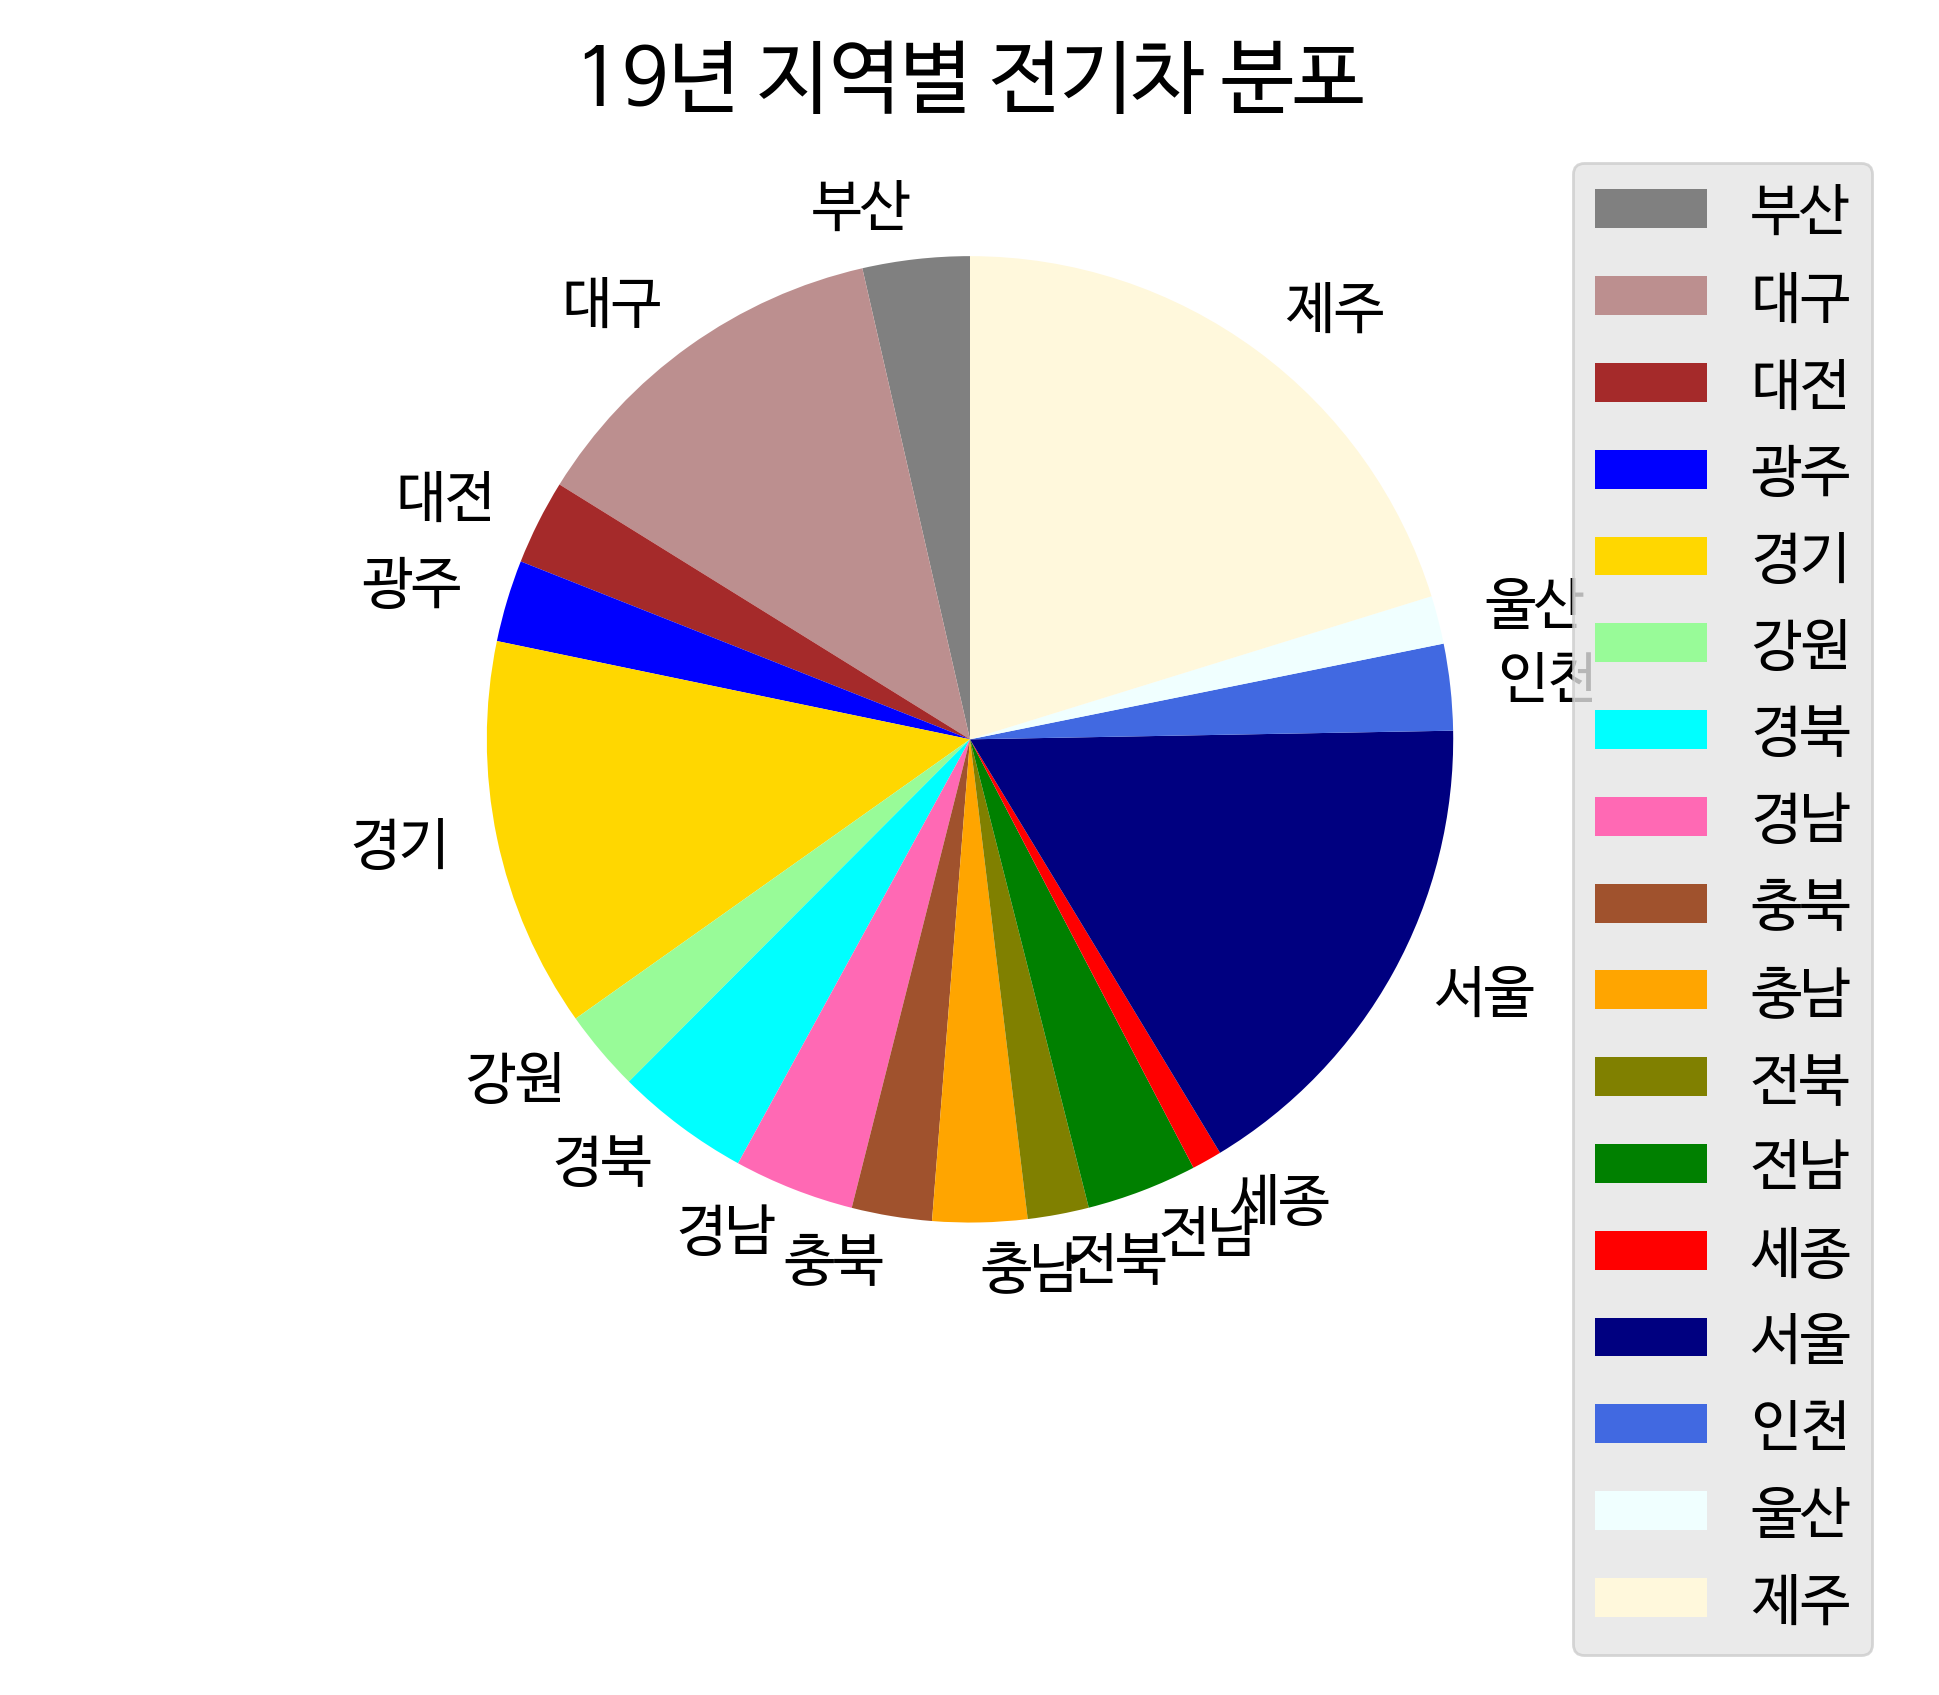

In [ ]:
color = ['gray','rosybrown','brown','blue','gold','palegreen','cyan','hotpink','sienna','orange','olive','green','red','navy','azure','royalblue','cornsilk']
plt.figure(dpi=200)

plt.axis('equal')
plt.pie(elecar19,labels=local,colors=color,startangle = 90) 
plt.title('19년 지역별 전기차 분포')
plt.legend()
plt.show()

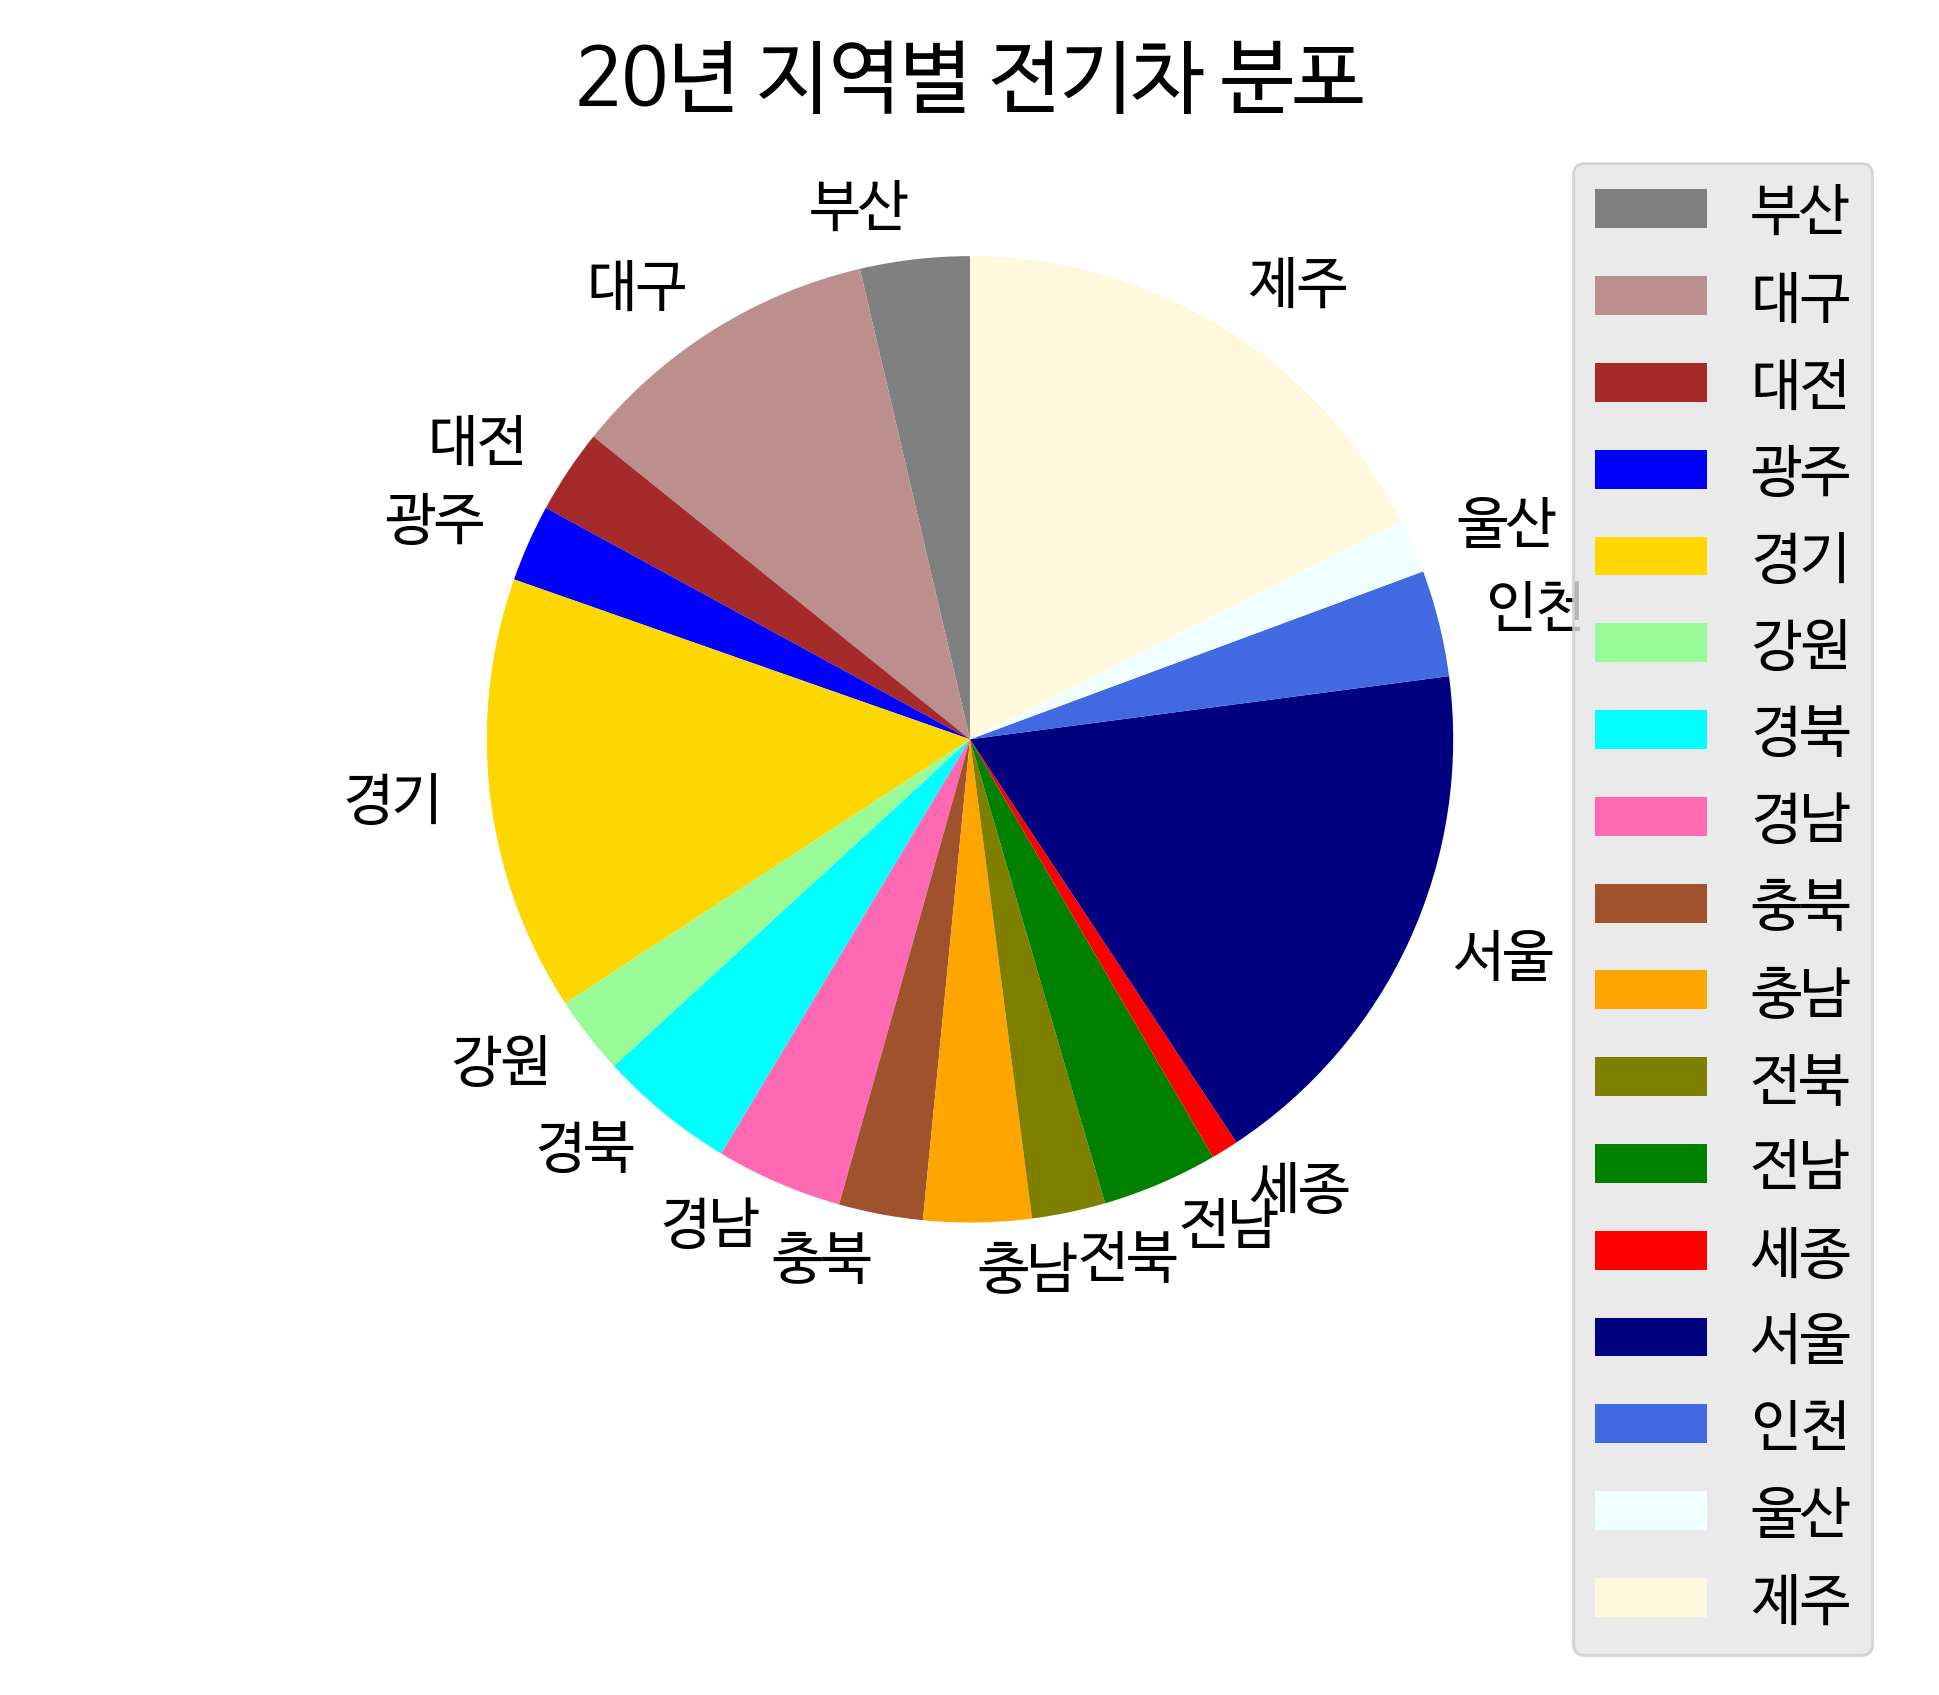

In [ ]:
color = ['gray','rosybrown','brown','blue','gold','palegreen','cyan','hotpink','sienna','orange','olive','green','red','navy','azure','royalblue','cornsilk']
plt.figure(dpi=200)

plt.axis('equal')
plt.pie(elecar20,labels=local,colors=color,startangle = 90) 
plt.title('20년 지역별 전기차 분포')
plt.legend()
plt.show()

토탈 등록수 막대 그래프 그리기

In [ ]:
car_df = pd.read_csv('/content/한국전력공사_지역별 전기차 현황정보_20201008.csv', encoding="euc-kr")

car_df.head()

,기준일,부산,대구,대전,광주,경기,강원,경북,경남,충북,충남,전북,전남,세종,서울,인천,울산,제주,합계
0,2018,1567,6605,1334,1447,6383,1377,2001,2107,1199,1127,997,1974,394,9564,1284,847,15549,55756
1,2019,3216,11313,2555,2464,11750,2445,4051,3626,2412,2841,1841,3326,903,14952,2598,1447,18178,89918
2,2020,4320,12468,3338,3046,17197,3091,5400,5003,3319,4252,2906,4576,1076,20997,4204,2142,20699,118034


In [ ]:
car_df = pd.read_csv('/content/한국전력공사_지역별 전기차 현황정보_20201008.csv', encoding="euc-kr")

car_df['기준일']=pd.to_datetime(car_df['기준일'],format='%Y')
fig = px.bar(car_df, x='기준일', y='합계', title='연도별 전기차 총합', color='기준일') 
fig.show()


강남구 승용차 연료종류 파이차트 그리기


In [ ]:

fig = px.pie(carKind_df, values='승용', names='연료종류', title='20년 7월 강남구 연료별 파이차트') 
fig.show()

In [ ]:
carKind_df = pd.read_csv('/content/21년 1월 기준 자치구별 연료별 자동차등록 현황_강남가공후.csv',encoding='euc-kr')
fig = px.pie(carKind_df, values='승용', names='연료종류', title='21년 1 월 강남구 연료별 파이차트') 
fig.show()

강남구 충전소 맵 시각화


In [ ]:
charger_df=pd.read_csv('/content/서울시 강남구 전기차 충전소 위치.csv')
charger_df.head()

,운영기관,충전소,ID,충전기타입,지역,시군구,주소,이용가능시간,급속충전량,경도,위도,상태
0,환경부(한국자동차환경협회),SETEC,1,DC차데모+AC3상+DC콤보,서울특별시,강남구,서울특별시 강남구 남부순환로3104,24시간 이용가능,급속(100kW멀티),127.071719,37.496717,정좌표
1,환경부(한국자동차환경협회),sh서울주택도시공사,11,DC콤보,서울특별시,강남구,서울특별시 강남구 개포로 621,24시간 이용가능,급속(200kW동시),127.078783,37.494132,정좌표
2,환경부(한국자동차환경협회),sh서울주택도시공사,12,DC콤보,서울특별시,강남구,서울특별시 강남구 개포로 621,24시간 이용가능,급속(200kW동시),127.078783,37.494132,정좌표
3,환경부(한국자동차환경협회),강남구청 삼성로 별관 부설 주차장,1,DC콤보,서울특별시,강남구,서울특별시 강남구 삼성로 628,09:00~18:00,급속(100kW멀티),127.052141,37.515908,정좌표
4,환경부(한국자동차환경협회),강남치매지원센터 공영노외주차장,21,DC콤보,서울특별시,강남구,서울특별시 강남구 선릉로108길 27,24시간 이용가능,급속(200kW동시),127.046380,37.510313,정좌표


In [ ]:
charger_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   운영기관    593 non-null    object 
 1   충전소     593 non-null    object 
 2   ID      593 non-null    int64  
 3   충전기타입   593 non-null    object 
 4   지역      593 non-null    object 
 5   시군구     593 non-null    object 
 6   주소      593 non-null    object 
 7   이용가능시간  487 non-null    object 
 8   급속충전량   29 non-null     object 
 9   경도      593 non-null    float64
 10  위도      593 non-null    float64
 11  상태      593 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 55.7+ KB


In [ ]:
charger_df=pd.read_csv('/content/서울시 강남구 전기차 충전소 위치.csv')

map = folium.Map(location=[37.51874205077231,127.05503339447326],zoom_start=13)
map


for n in charger_df.index:
  folium.Marker([charger_df.loc[n,'위도'],charger_df.loc[n,'경도']],
                 popup='충전소', icon=folium.Icon(color='blue',icon='glyphicon glyphicon-flash')).add_to(map)

map